In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
metro_all = pd.read_csv("C:/Users/82105/Desktop/2학년_2학기/오픈소스_개발_프로젝트/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv",encoding = 'cp949')

In [4]:
#최근3년만 추출
metro_recent_c=metro_all
metro_recent_c=metro_recent_c.drop(columns={'작업일자'}) #불필요한 칼럼 제거
#사용월을 datetime으로 바꿔준다.
metro_recent_c = metro_all[(metro_all['사용월']>=202010)]
metro_recent_c['사용월'] = pd.to_datetime(metro_recent_c['사용월'].astype(str), format='%Y%m')
metro_recent_c


,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,2023-10-01,1호선,동대문,688,23,11493,2221,9618,6755,14951,...,9061,555,2415,1,221,0,0,0,0,20231103
1,2023-10-01,1호선,동묘앞,208,1,3065,1120,3652,4528,7542,...,4288,85,1680,1,318,0,0,0,0,20231103
2,2023-10-01,1호선,서울역,700,16,8826,9093,13369,60044,42194,...,14003,2333,2475,2,184,0,0,0,0,20231103
3,2023-10-01,1호선,시청,60,1,2408,5020,4325,26689,8093,...,4416,323,855,0,12,0,0,0,0,20231103
4,2023-10-01,1호선,신설동,388,18,9245,2315,9988,8178,21304,...,9543,289,2263,0,0,0,0,0,0,20231103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22594,2020-10-01,중앙선,원덕,32,0,305,9,441,135,794,...,231,1,117,0,0,0,0,0,0,20201103
22595,2020-10-01,중앙선,중랑,176,2,5954,505,8338,1956,20492,...,4325,78,974,0,0,0,0,0,0,20201103
22596,2020-10-01,중앙선,지평,0,0,0,0,0,0,292,...,0,0,0,0,0,0,0,0,0,20201103
22597,2020-10-01,중앙선,팔당,1,0,231,101,628,680,1514,...,190,23,84,0,0,0,0,0,0,20201103


In [5]:
def process_line(line, metro_recent):
    # 해당 호선 데이터 추출
    metro = metro_recent_c.groupby(['호선명','지하철역']).mean().reset_index()
    metro_line = metro[metro['호선명'] == line]
    
    # 승차 인원 컬럼 추출
    metro_get_on_devide = pd.DataFrame()  # 변수 초기화 추가
    metro_get_on_devide['지하철역'] = metro_line['지하철역']
    for i in range(int((len(metro_recent.columns)-3)/2)):
        metro_get_on_devide[metro_line.columns[3+2*i]] = metro_line[metro_line.columns[3+2*i]]
    metro_get_on_devide = metro_get_on_devide.set_index('지하철역')

    # 하차 인원 컬럼 추출
    metro_get_off = pd.DataFrame()
    metro_get_off['지하철역'] = metro_line['지하철역']
    for i in range(int((len(metro_recent.columns)-3)/2)):
        metro_get_off[metro_line.columns[4+2*i]] = metro_line[metro_line.columns[4+2*i]]
    metro_get_off = metro_get_off.set_index('지하철역')

    # 역 별 평균 승하차 인원 계산
    df = pd.DataFrame(index=metro_line['지하철역'])
    df['평균 승차 인원 수'] = metro_get_on_devide.mean(axis=1).astype('int64')
    df['평균 하차 인원 수'] = metro_get_off.mean(axis=1).astype(int)
    
    # 추가: 평균 승차 인원 수와 평균 하차 인원 수의 합계 열 추가
    df['평균 승하차 합계'] = df['평균 승차 인원 수'] + df['평균 하차 인원 수']
    
    top3_on = df.sort_values(by='평균 승차 인원 수', ascending=False).head(3)
    
    return top3_on

# 1호선부터 9호선까지 처리
result_frames = []
for line_number in range(1, 10):
    line_name = f"{line_number}호선"
    result = process_line(line_name, metro_recent_c)
    result_frames.append(result)

# 각 노선별 상위 3개의 역을 담은 데이터프레임을 생성
top3_per_line = pd.concat(result_frames, keys=[f"{i}호선" for i in range(1, 10)])

# 결과 확인
#print(top3_per_line)

top3_per_line
# 이렇게 노션별 상위3개의 역을 알았다.

평균 승차 인원 수  평균 하차 인원 수  평균 승하차 합계
    지하철역                                          
1호선 서울역               52562       50378     102940
    종각                38456       37283      75739
    종로3가              29201       26706      55907
2호선 강남                89011       87066     176077
    잠실(송파구청)          82314       81086     163400
    홍대입구              69352       73590     142942
3호선 고속터미널             52902       51301     104203
    연신내               40971       38772      79743
    양재(서초구청)          40053       43539      83592
4호선 수유(강북구청)          38377       38281      76658
    혜화                38238       38576      76814
    쌍문                32631       30020      62651
5호선 광화문(세종문화회관)       33059       34408      67467
    까치산               32189       30866      63055
    화곡                31616       29464      61080
6호선 공덕                19779       19139      38918
    응암                19619       19423      39042
    망원                16386       17656      34042
7호선 가산디지털단지           45482       45138      90620
    학동                24626       26082      50708
    광명사거리             24467       24158      48625
8호선 문정                22005       23019      45024
    암사                20747       18461      39208
    장지                19131       18213      37344
9호선 신논현               34682       34261      68943
    노량진               29215       28706      57921
    여의도               28797       27491      56288

In [6]:
# 승하차 합계 기준으로 각 역의 합계 계산
station_totals = top3_per_line.groupby(level=0).sum()

# 결과 출력
#print("각 역별 승하차 합계:\n", station_totals)




# 상위 2개 호선 찾기
top2_lines = station_totals.nlargest(2, '평균 승하차 합계')

# 결과 출력
#print("상위 2개 호선 (승하차 합계 기준):\n", top2_lines)
top2_lines

#2호선 3호선이 젤 많아!!

,평균 승차 인원 수,평균 하차 인원 수,평균 승하차 합계
2호선,240677,241742,482419
3호선,133926,133612,267538


In [7]:
#승차
metro_recent_c_geton = pd.DataFrame()
metro_recent_c_geton['호선명'] = metro_recent_c['호선명']
metro_recent_c_geton['지하철역'] = metro_recent_c['지하철역']
metro_recent_c_geton['사용월'] = metro_recent_c['사용월']
for i in range(int((len(metro_recent_c.columns)-3)/2)):  #맨처음 index는 무시하고 3,5,7,..순서대로 승차인원이므로&24개씩 승차 하차 인원이 있으므로
    metro_recent_c_geton[metro_recent_c.columns[3+2*i]] = metro_recent_c[metro_recent_c.columns[3+2*i]]
metro_recent_c_geton

,호선명,지하철역,사용월,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
0,1호선,동대문,2023-10-01,688,11493,9618,14951,20657,19909,18030,...,25680,17817,15062,13799,10430,4866,555,1,0,0
1,1호선,동묘앞,2023-10-01,208,3065,3652,7542,12370,11293,13116,...,24843,10039,5844,4793,3530,1141,85,1,0,0
2,1호선,서울역,2023-10-01,700,8826,13369,42194,75501,70759,67566,...,220828,123025,89108,87580,59608,29305,2333,2,0,0
3,1호선,시청,2023-10-01,60,2408,4325,8093,11102,14674,17236,...,158616,69239,62691,53963,32319,10655,323,0,0,0
4,1호선,신설동,2023-10-01,388,9245,9988,21304,31140,22327,19391,...,49687,20869,13794,12004,8113,3693,289,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22594,중앙선,원덕,2020-10-01,32,305,441,794,861,716,822,...,671,334,148,63,32,12,1,0,0,0
22595,중앙선,중랑,2020-10-01,176,5954,8338,20492,19471,12192,8846,...,6998,4492,3183,2698,1863,920,78,0,0,0
22596,중앙선,지평,2020-10-01,0,0,0,292,155,7,337,...,61,160,1,2,0,0,0,0,0,0
22597,중앙선,팔당,2020-10-01,1,231,628,1514,1589,1225,1414,...,3614,2386,1674,1445,989,179,23,0,0,0


In [8]:
#하차
metro_recent_c_getoff = pd.DataFrame()
metro_recent_c_getoff['호선명'] = metro_recent_c['호선명']
metro_recent_c_getoff['지하철역'] = metro_recent_c['지하철역']
metro_recent_c_getoff['사용월'] = metro_recent_c['사용월']
for i in range(int((len(metro_recent_c.columns)-4)/2)):
    metro_recent_c_getoff[metro_recent_c.columns[4+2*i]] = metro_recent_c[metro_recent_c.columns[4+2*i]]
metro_recent_c_getoff

,호선명,지하철역,사용월,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,...,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
0,1호선,동대문,2023-10-01,23,2221,6755,12017,20541,23460,26158,...,22333,21418,14927,13295,12184,9061,2415,221,0,0
1,1호선,동묘앞,2023-10-01,1,1120,4528,9281,21560,18828,25633,...,11845,8575,6512,6467,7088,4288,1680,318,0,0
2,1호선,서울역,2023-10-01,16,9093,60044,111515,226340,157304,85381,...,95463,66792,48809,44886,29468,14003,2475,184,0,0
3,1호선,시청,2023-10-01,1,5020,26689,70011,186809,91258,53117,...,29295,14841,9941,8943,6830,4416,855,12,0,0
4,1호선,신설동,2023-10-01,18,2315,8178,22493,52860,32651,22218,...,30045,22603,15561,15576,13190,9543,2263,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22594,중앙선,원덕,2020-10-01,0,9,135,428,699,785,904,...,616,672,415,429,235,231,117,0,0,0
22595,중앙선,중랑,2020-10-01,2,505,1956,2904,5669,4484,4177,...,20727,13780,10545,8767,6674,4325,974,0,0,0
22596,중앙선,지평,2020-10-01,0,0,0,125,368,0,446,...,44,141,3,0,0,0,0,0,0,0
22597,중앙선,팔당,2020-10-01,0,101,680,1605,2692,5097,3726,...,1907,1493,648,448,459,190,84,0,0,0


In [9]:
#시간 4분할 (승차)
metro_recent_c_geton['출근시간6-9']=metro_recent_c_geton.iloc[:, 5:8].sum(axis=1)
metro_recent_c_geton['점심시간11-14']=metro_recent_c_geton.iloc[:, 10:13].sum(axis=1)
metro_recent_c_geton['퇴근시간17-20']=metro_recent_c_geton.iloc[:, 16:19].sum(axis=1)
metro_recent_c_geton['야간시간22-24']=metro_recent_c_geton.iloc[:, 21:23].sum(axis=1)

#4분할만 남기고 드롭

metro_recent_c_geton_4time=metro_recent_c_geton.drop(metro_recent_c_geton.columns[3:27], axis=1)
metro_recent_c_geton_4time

,호선명,지하철역,사용월,출근시간6-9,점심시간11-14,퇴근시간17-20,야간시간22-24
0,1호선,동대문,2023-10-01,45226,72198,71973,15296
1,1호선,동묘앞,2023-10-01,23564,78579,72411,4671
2,1호선,서울역,2023-10-01,131064,277083,518332,88913
3,1호선,시청,2023-10-01,23520,80217,326434,42974
4,1호선,신설동,2023-10-01,62432,69486,110299,11806
...,...,...,...,...,...,...,...
22594,중앙선,원덕,2020-10-01,2096,2040,2022,44
22595,중앙선,중랑,2020-10-01,48301,24504,18090,2783
22596,중앙선,지평,2020-10-01,447,0,222,0
22597,중앙선,팔당,2020-10-01,3731,4926,10332,1168


In [10]:
#시간 4분할 (하차)
metro_recent_c_getoff['출근시간6-9']=metro_recent_c_getoff.iloc[:, 5:8].sum(axis=1)
metro_recent_c_getoff['점심시간11-14']=metro_recent_c_getoff.iloc[:, 10:13].sum(axis=1)
metro_recent_c_getoff['퇴근시간17-20']=metro_recent_c_getoff.iloc[:, 16:19].sum(axis=1)
metro_recent_c_getoff['야간시간22-24']=metro_recent_c_getoff.iloc[:, 21:23].sum(axis=1)

#4분할만 남기고 드롭

metro_recent_c_getoff_4time=metro_recent_c_getoff.drop(metro_recent_c_getoff.columns[3:27], axis=1)
metro_recent_c_getoff_4time

,호선명,지하철역,사용월,출근시간6-9,점심시간11-14,퇴근시간17-20,야간시간22-24
0,1호선,동대문,2023-10-01,39313,86251,66071,21245
1,1호선,동묘앞,2023-10-01,35369,115163,36323,11376
2,1호선,서울역,2023-10-01,397899,251946,257839,43471
3,1호선,시청,2023-10-01,283509,146698,77339,11246
4,1호선,신설동,2023-10-01,83531,60342,77606,22733
...,...,...,...,...,...,...,...
22594,중앙선,원덕,2020-10-01,1262,2565,2252,466
22595,중앙선,중랑,2020-10-01,10529,16095,47582,10999
22596,중앙선,지평,2020-10-01,493,1,186,0
22597,중앙선,팔당,2020-10-01,4977,9605,5693,649


In [11]:
#2호선 승차데이터
metro_recent_c_geton_4time_2ndline = metro_recent_c_geton_4time[metro_recent_c_geton_4time['호선명']=='2호선']


#2호선중 강남, 잠실, 홍대입구
metro_recent_c_geton_4time_2nd_line_123 = metro_recent_c_geton_4time_2ndline[
    metro_recent_c_geton_4time_2ndline['지하철역'].isin(['강남', '잠실(송파구청)', '홍대입구'])
]

metro_recent_c_geton_4time_2nd_line_123

,호선명,지하철역,사용월,출근시간6-9,점심시간11-14,퇴근시간17-20,야간시간22-24
10,2호선,강남,2023-10-01,116856,249917,732645,220645
52,2호선,잠실(송파구청),2023-10-01,323016,289048,615476,133236
59,2호선,홍대입구,2023-10-01,177562,228290,551300,275156
627,2호선,강남,2023-09-01,113285,244934,713297,219564
669,2호선,잠실(송파구청),2023-09-01,311846,267958,556111,125340
...,...,...,...,...,...,...,...
21443,2호선,잠실(송파구청),2020-11-01,287827,219032,474179,84737
21450,2호선,홍대입구,2020-11-01,152445,146248,372483,166395
22004,2호선,강남,2020-10-01,107003,221380,732822,237046
22046,2호선,잠실(송파구청),2020-10-01,273314,219080,463658,92690


In [12]:
#2호선 하차데이터
metro_recent_c_getoff_4time_2ndline = metro_recent_c_getoff_4time[metro_recent_c_getoff_4time['호선명']=='2호선']


#2호선중 강남, 잠실, 홍대입구
metro_recent_c_getoff_4time_2nd_line_123 = metro_recent_c_getoff_4time_2ndline[
    metro_recent_c_getoff_4time_2ndline['지하철역'].isin(['강남', '잠실(송파구청)', '홍대입구'])
]

metro_recent_c_getoff_4time_2nd_line_123

,호선명,지하철역,사용월,출근시간6-9,점심시간11-14,퇴근시간17-20,야간시간22-24
10,2호선,강남,2023-10-01,473405,312660,401785,60838
52,2호선,잠실(송파구청),2023-10-01,302868,376302,575669,128641
59,2호선,홍대입구,2023-10-01,165975,445131,610358,126225
627,2호선,강남,2023-09-01,470334,299000,398639,60157
669,2호선,잠실(송파구청),2023-09-01,273201,342624,549461,124336
...,...,...,...,...,...,...,...
21443,2호선,잠실(송파구청),2020-11-01,257676,249385,465063,100017
21450,2호선,홍대입구,2020-11-01,134661,254912,434960,66157
22004,2호선,강남,2020-10-01,469010,320257,423875,56832
22046,2호선,잠실(송파구청),2020-10-01,240683,252741,451434,108003


In [13]:
#3호선 승차데이터
metro_recent_c_geton_4time_3ndline = metro_recent_c_geton_4time[metro_recent_c_geton_4time['호선명']=='3호선']


#3호선중 고속터미널, 연신내, 양재(서초입구)
metro_recent_c_geton_4time_3nd_line_123 = metro_recent_c_geton_4time_3ndline[
    metro_recent_c_geton_4time_3ndline['지하철역'].isin(['고속터미널', '연신내', '양재(서초입구)'])
]

metro_recent_c_geton_4time_3nd_line_123

,호선명,지하철역,사용월,출근시간6-9,점심시간11-14,퇴근시간17-20,야간시간22-24
63,3호선,고속터미널,2023-10-01,82597,249450,412985,77320
83,3호선,연신내,2023-10-01,302921,177119,137973,27726
680,3호선,고속터미널,2023-09-01,77329,230246,387442,76361
700,3호선,연신내,2023-09-01,296752,162000,131815,27356
1296,3호선,고속터미널,2023-08-01,77368,236613,389737,70683
...,...,...,...,...,...,...,...
20871,3호선,연신내,2020-12-01,294103,126782,102474,10121
21454,3호선,고속터미널,2020-11-01,66732,175645,330110,51136
21474,3호선,연신내,2020-11-01,334412,153224,128359,24540
22057,3호선,고속터미널,2020-10-01,63605,179962,339382,60179


In [14]:
#3호선 하차데이터


metro_recent_c_getoff_4time_3ndline = metro_recent_c_getoff_4time[metro_recent_c_getoff_4time['호선명']=='3호선']


#3호선중 고속터미널, 연신내, 양재(서초입구)
metro_recent_c_getoff_4time_3nd_line_123 = metro_recent_c_getoff_4time_3ndline[
    metro_recent_c_getoff_4time_3ndline['지하철역'].isin(['고속터미널', '연신내', '양재(서초입구)'])
]

metro_recent_c_getoff_4time_3nd_line_123

,호선명,지하철역,사용월,출근시간6-9,점심시간11-14,퇴근시간17-20,야간시간22-24
63,3호선,고속터미널,2023-10-01,162058,304651,300658,37358
83,3호선,연신내,2023-10-01,72098,121432,321347,85793
680,3호선,고속터미널,2023-09-01,168590,299138,304542,39980
700,3호선,연신내,2023-09-01,70294,115316,305064,82284
1296,3호선,고속터미널,2023-08-01,158560,295027,289157,36657
...,...,...,...,...,...,...,...
20871,3호선,연신내,2020-12-01,52715,94565,287942,44435
21454,3호선,고속터미널,2020-11-01,137147,230462,257648,28634
21474,3호선,연신내,2020-11-01,64066,105991,331143,83562
22057,3호선,고속터미널,2020-10-01,134222,235768,255142,29799


---

---

In [15]:
# 승하차 데이터를 합친 데이터셋
metro_recent_c_total=pd.DataFrame()
metro_recent_c_total['호선명'] = metro_recent_c['호선명']
metro_recent_c_total['지하철역'] = metro_recent_c['지하철역']
metro_recent_c_total['사용월'] = metro_recent_c['사용월']
metro_recent_c_total['출근시간6-9']=metro_recent_c.iloc[:, 7:13].sum(axis=1)   
metro_recent_c_total['점심시간11-14']=metro_recent_c.iloc[:, 17:23].sum(axis=1)
metro_recent_c_total['퇴근시간17-20']=metro_recent_c.iloc[:, 29:35].sum(axis=1)
metro_recent_c_total['야간시간22-24']=metro_recent_c.iloc[:, 39:43].sum(axis=1)
metro_recent_c_total

,호선명,지하철역,사용월,출근시간6-9,점심시간11-14,퇴근시간17-20,야간시간22-24
0,1호선,동대문,2023-10-01,84539,158449,138044,36541
1,1호선,동묘앞,2023-10-01,58933,193742,108734,16047
2,1호선,서울역,2023-10-01,528963,529029,776171,132384
3,1호선,시청,2023-10-01,307029,226915,403773,54220
4,1호선,신설동,2023-10-01,145963,129828,187905,34539
...,...,...,...,...,...,...,...
22594,중앙선,원덕,2020-10-01,3358,4605,4274,510
22595,중앙선,중랑,2020-10-01,58830,40599,65672,13782
22596,중앙선,지평,2020-10-01,940,1,408,0
22597,중앙선,팔당,2020-10-01,8708,14531,16025,1817


In [16]:
metro_recent_c_total['월평균승객']=metro_recent_c_total.iloc[:,3:].mean(axis=1)
metro_recent_c_total

,호선명,지하철역,사용월,출근시간6-9,점심시간11-14,퇴근시간17-20,야간시간22-24,월평균승객
0,1호선,동대문,2023-10-01,84539,158449,138044,36541,104393.25
1,1호선,동묘앞,2023-10-01,58933,193742,108734,16047,94364.00
2,1호선,서울역,2023-10-01,528963,529029,776171,132384,491636.75
3,1호선,시청,2023-10-01,307029,226915,403773,54220,247984.25
4,1호선,신설동,2023-10-01,145963,129828,187905,34539,124558.75
...,...,...,...,...,...,...,...,...
22594,중앙선,원덕,2020-10-01,3358,4605,4274,510,3186.75
22595,중앙선,중랑,2020-10-01,58830,40599,65672,13782,44720.75
22596,중앙선,지평,2020-10-01,940,1,408,0,337.25
22597,중앙선,팔당,2020-10-01,8708,14531,16025,1817,10270.25


In [17]:
#2호선의 top3 강남, 잠실(송파구청), 홍대입구역만 추출해서 시각화
metro_line2_top1=metro_recent_c_total[(metro_recent_c_total['지하철역']=='강남') & (metro_recent_c_total['호선명']=='2호선')]
metro_line2_top1
metro_line2_top2=metro_recent_c_total[(metro_recent_c_total['지하철역']=='잠실(송파구청)') & (metro_recent_c_total['호선명']=='2호선')]
metro_line2_top2
metro_line2_top3=metro_recent_c_total[(metro_recent_c_total['지하철역']=='홍대입구') & (metro_recent_c_total['호선명']=='2호선')]
metro_line2_top3

,호선명,지하철역,사용월,출근시간6-9,점심시간11-14,퇴근시간17-20,야간시간22-24,월평균승객
59,2호선,홍대입구,2023-10-01,343537,673421,1161658,401381,644999.25
676,2호선,홍대입구,2023-09-01,325527,604851,1083730,385776,599971.00
1292,2호선,홍대입구,2023-08-01,331840,652365,1104224,390661,619772.50
1908,2호선,홍대입구,2023-07-01,335378,672601,1128928,413242,637537.25
2524,2호선,홍대입구,2023-06-01,343571,633569,1084964,411166,618317.50
3138,2호선,홍대입구,2023-05-01,350782,644670,1127759,413510,634180.25
3752,2호선,홍대입구,2023-04-01,346553,616825,1105234,398155,616691.75
4365,2호선,홍대입구,2023-03-01,361650,630759,1179666,413571,646411.50
4982,2호선,홍대입구,2023-02-01,300813,601898,1061409,367336,582864.00
5595,2호선,홍대입구,2023-01-01,303763,581521,1033795,360746,569956.25


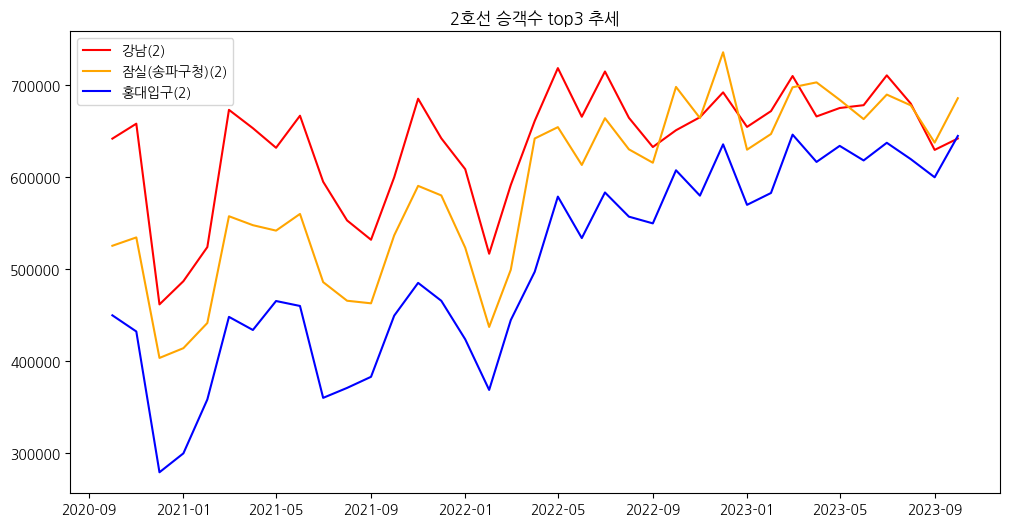

In [18]:
#2호선 top3역 3년간 승하차 평균 월별로 나타냄

#폰트 깨짐 해결
from matplotlib import font_manager, rc

font_path = "C:/Users/82105/Desktop/2학년_2학기/오픈소스_개발_프로젝트/나눔 글꼴/나눔고딕/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name) 


plt.figure(figsize=(12,6))
plt.title('2호선 승객수 top3 추세')
plt.plot(metro_line2_top1['사용월'],metro_line2_top1['월평균승객'],color='red', label='강남(2)')
plt.plot(metro_line2_top2['사용월'],metro_line2_top2['월평균승객'],color='orange', label='잠실(송파구청)(2)')
plt.plot(metro_line2_top3['사용월'],metro_line2_top3['월평균승객'],color='blue',label='홍대입구(2)')
plt.legend()
plt.show()


In [19]:
#3호선의 top3 고속터미널, 연신내, 양재(서초구청)역만 추출해서 시각화
metro_line3_top1=metro_recent_c_total[(metro_recent_c_total['지하철역']=='고속터미널') & (metro_recent_c_total['호선명']=='3호선')]
metro_line3_top1
metro_line3_top2=metro_recent_c_total[(metro_recent_c_total['지하철역']=='연신내') & (metro_recent_c_total['호선명']=='3호선')]
metro_line3_top2
metro_line3_top3=metro_recent_c_total[(metro_recent_c_total['지하철역']=='양재(서초구청)') & (metro_recent_c_total['호선명']=='3호선')]
metro_line3_top3

,호선명,지하철역,사용월,출근시간6-9,점심시간11-14,퇴근시간17-20,야간시간22-24,월평균승객
82,3호선,양재(서초구청),2023-10-01,452939,254283,578584,90545,344087.75
699,3호선,양재(서초구청),2023-09-01,441393,240966,554514,86599,330868.00
1315,3호선,양재(서초구청),2023-08-01,468505,228720,581576,85899,341175.00
1931,3호선,양재(서초구청),2023-07-01,479018,244188,591358,92033,351649.25
2547,3호선,양재(서초구청),2023-06-01,484545,251551,598167,95723,357496.50
3161,3호선,양재(서초구청),2023-05-01,483669,259096,595590,97203,358889.50
3775,3호선,양재(서초구청),2023-04-01,477576,258830,589902,92243,354637.75
4388,3호선,양재(서초구청),2023-03-01,515515,264326,639255,99626,379680.50
5005,3호선,양재(서초구청),2023-02-01,445434,245467,574836,88649,338596.50
5618,3호선,양재(서초구청),2023-01-01,437679,232197,560039,86938,329213.25


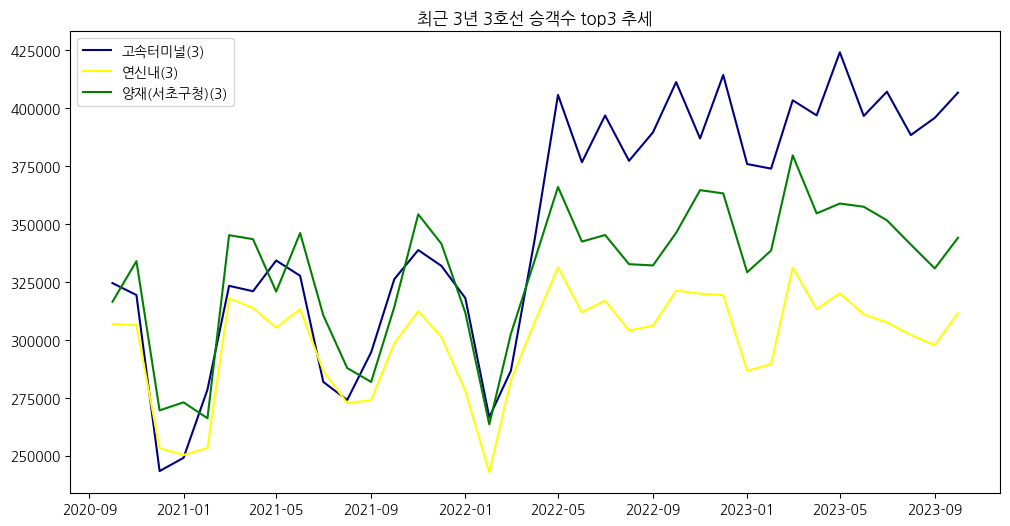

In [20]:
#3호선 top3역 3년간 승하차 평균 월별로 나타냄

#폰트 깨짐 해결
font_path = "C:/Users/82105/Desktop/2학년_2학기/오픈소스_개발_프로젝트/나눔 글꼴/나눔고딕/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name) 


plt.figure(figsize=(12,6))
plt.title('최근 3년 3호선 승객수 top3 추세')
plt.plot(metro_line3_top1['사용월'],metro_line3_top1['월평균승객'],color='navy', label='고속터미널(3)')
plt.plot(metro_line3_top2['사용월'],metro_line3_top2['월평균승객'],color='yellow', label='연신내(3)')
plt.plot(metro_line3_top3['사용월'],metro_line3_top3['월평균승객'],color='green', label='양재(서초구청)(3)')
plt.legend()
plt.show()

In [21]:
# 예측도구(SARIMA) 임포트
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf #(p,q)의 차수를 결정하기 위해
from statsmodels.tsa.seasonal import seasonal_decompose      #ETS 분해를 위해
from pmdarima import auto_arima                              #자동 ARIMA 사용을 위해
#자동 ARIMA(자동회귀누적이동평균)모델
#자기 회귀-현재 값이 이전 값들의 선형조합으로 표현됨을 나타냄.p는 이전 값들의 개수
#현재의 값이 과거의 값들에 의존한다는 가정
#yt=c+ϕ1yt−1+ϕ2yt−2+⋯+ϕpyt−p+εt,      ϕ는 각각의 과거 값에 대한 가중치,εt는 모델의 오차항 

#누적 이동 평균-새로운 값이 들어올 때마다 평균을 최신화함
#차분-추세와 계절성을 제거

# 평가도구 임포트
from sklearn.metrics import mean_squared_error #평균과 데이터의 차를 제곱후 합함
from statsmodels.tools.eval_measures import rmse #위 값의 제곱근을 구함

# 경고 무시
import warnings
warnings.filterwarnings("ignore")

---
### 강남역 예측 모델

---

### 1.a 원본 데이터 플롯으로 그리기(계절성, 추세 확인)

In [22]:
metro_line2_top1_pred=pd.DataFrame()
metro_line2_top1_pred['사용월']=metro_line2_top1['사용월']
metro_line2_top1_pred['월평균승객']=metro_line2_top1['월평균승객']
metro_line2_top1_pred.set_index('사용월',inplace=True)
metro_line2_top1_pred.head()


,월평균승객
사용월,
2023-10-01,642187.75
2023-09-01,629802.50
2023-08-01,680279.25
2023-07-01,710963.50
2023-06-01,678488.25


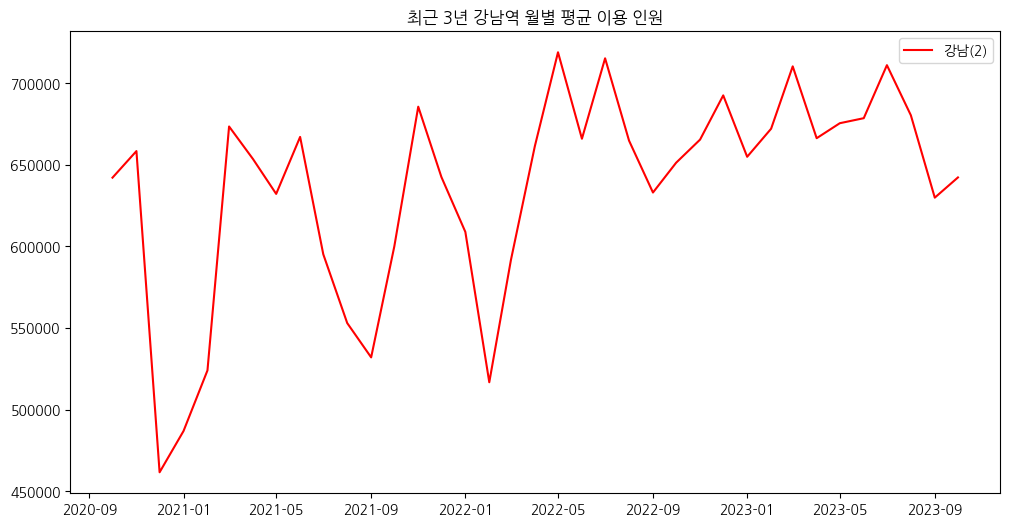

In [23]:
plt.figure(figsize=(12,6))
plt.title('최근 3년 강남역 월별 평균 이용 인원')
plt.plot(metro_line2_top1_pred['월평균승객'],color='red', label='강남(2)')
plt.legend()
plt.show()

### 1.b ETS 분해

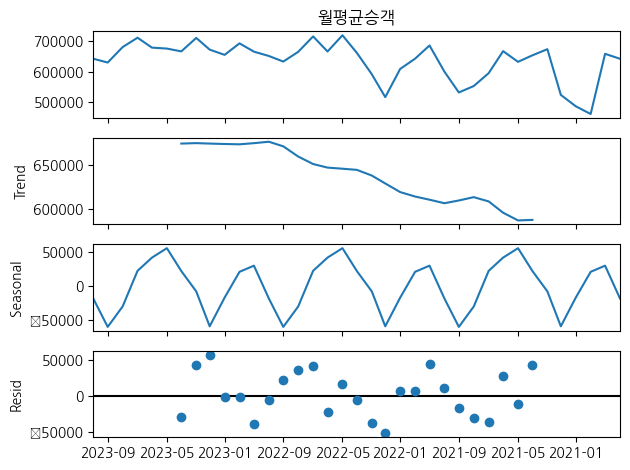

In [24]:
result = seasonal_decompose(metro_line2_top1_pred['월평균승객'], model='add')
result.plot();

### 1.c 자동ARIMA로 추천모델 도출.

In [25]:
auto_arima(metro_line2_top1_pred['월평균승객'],seasonal=True,m=12).summary()
#계절성주기를 12(1년 12개월) 입력하여 SARIMAX를 결정받는다.
#seasonal=True 는 계절성을 갖음을 나타냄
#SARIMAX(0,1,0)을 추천

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   37
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -447.212
Date:                Thu, 23 Nov 2023   AIC                            896.424
Time:                        02:06:49   BIC                            898.008
Sample:                             0   HQIC                           896.977
                                 - 37                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.512e+09   5.78e+08      6.073      0.000    2.38e+09    4.65e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 6.88
Prob(Q):                              0.79   Prob(JB):                         0.03
Heteroskedasticity (H):               7.14   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 1.d 훈련 데이터셋과 테스트데이터셋으로 분리.

In [26]:
train = metro_line2_top1_pred.iloc[len(metro_line2_top1_pred)-24:]       #3년전부터 1년전까지
test = metro_line2_top1_pred.iloc[:len(metro_line2_top1_pred)-24]      #1년전부터 올해

### 1.e 자동 ARIMA가 제공하는 차수를 통해 예측값을 얻는다.

In [43]:
model = SARIMAX(train['월평균승객'],order=(0,1,0),seasonal_order=(1,0,0,12),trend='t')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              월평균승객   No. Observations:                   24
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -289.602
Date:                            Thu, 23 Nov 2023   AIC                            585.204
Time:                                    02:13:22   BIC                            588.610
Sample:                                         0   HQIC                           586.060
                                             - 24                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift        144.9375    899.965      0.161      0.872   -1618.961    1908.836
ar.S.L12      -0.0709      0.232     -0.305      0.760      -0.526       0.385
sigma2       5.16e+09      0.000   2.42e+13      0.000    5.16e+09    5.16e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 1.54
Prob(Q):                              0.78   Prob(JB):                         0.46
Heteroskedasticity (H):               2.18   Skew:                             0.38
Prob(H) (two-sided):                  0.29   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.01e+28. Standard errors may be unstable.
"""

### 1.f 예측값과 테스트값을 플롯에 표기

In [44]:
start=len(train)
end=len(train)+len(test)-1

predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')
#구하려는값이 차분되는 값인지 실제값인지를 결정하는 파라미터
predictions

24    650353.146371
25    652486.010464
26    653266.787904
27    652083.788735
28    658616.781436
29    661307.668443
30    664240.290102
31    679326.491317
32    686596.693314
33    693171.352805
34    684150.531150
35    690377.147234
36    695006.749288
Name: predicted_mean, dtype: float64

In [45]:
#인덱스 달아주기(예측값이 데이터 프레임이 아니기 때문에)

data=predictions
dates = ['2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
         '2023-02-01','2023-03-01','2023-04-01','2023-05-01',
         '2023-06-01','2023-07-01','2023-08-01','2023-09-01','2023-10-01']
predictions_df = pd.DataFrame(data.values, index=pd.to_datetime(dates))
predictions_df.reset_index(inplace=True)
predictions_df.rename(columns={'index':'사용월',0:'예측값'}, inplace=True)
predictions_df.set_index('사용월',inplace=True)
predictions_df

,예측값
사용월,
2022-10-01,650353.146371
2022-11-01,652486.010464
2022-12-01,653266.787904
2023-01-01,652083.788735
2023-02-01,658616.781436
2023-03-01,661307.668443
2023-04-01,664240.290102
2023-05-01,679326.491317
2023-06-01,686596.693314


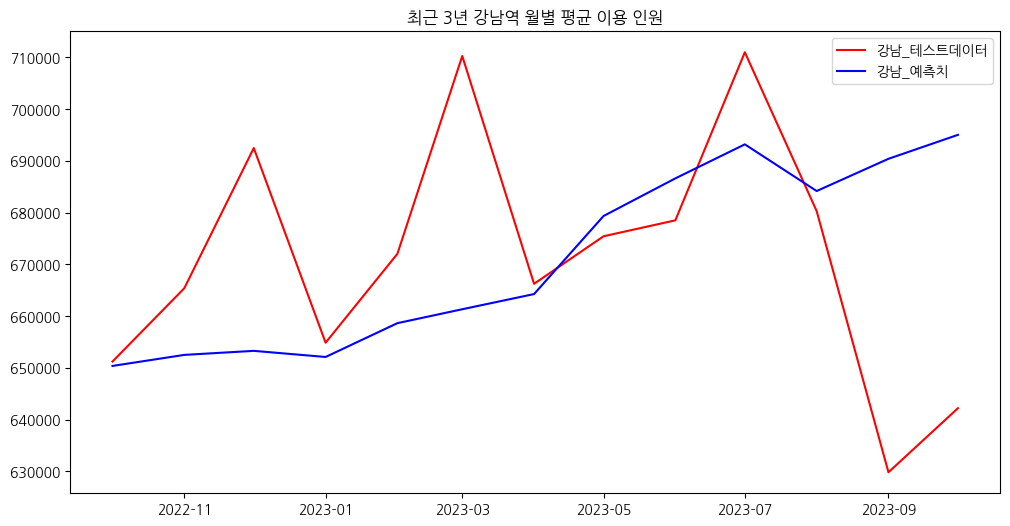

In [46]:
#예측치와 test 데이터 비교
plt.figure(figsize=(12,6))
plt.title('최근 3년 강남역 월별 평균 이용 인원')
plt.plot(test['월평균승객'],color='red', label='강남_테스트데이터')
plt.plot(predictions_df['예측값'],color='blue', label='강남_예측치')
plt.legend()
plt.show()

### 1.g 평균제곱근 오차를 통해 모델 평가

In [47]:
#test데이터의 평균
test['월평균승객'].mean()

671498.2115384615

In [48]:
#평균 제곱근 오차
error = rmse(test['월평균승객'], predictions_df['예측값'])
print(f'평균 제곱근 오차: {error:11.10}')

평균 제곱근 오차: 28590.61488


오차가   
(28,590/671,498)*100 = 4.25% 로 구해짐

### 2. 이후 1년 후 데이터를 예측한다.

In [55]:
model = SARIMAX(metro_line2_top1_pred['월평균승객'],order=(1,1,0),seasonal_order=(1,0,0,12), trend='t')
results = model.fit()
fcast = results.predict(len(metro_line2_top1_pred),len(metro_line2_top1_pred)+11,typ='levels').rename('미래_예측값')

In [53]:
#미래_예측값 데이터프레임 만들기
data=fcast
dates = ['2023-11-01', '2023-12-01', '2024-01-01',
         '2024-02-01','2024-03-01','2024-04-01','2024-05-01',
         '2024-06-01','2024-07-01','2024-08-01','2024-09-01','2024-10-01']
predictions_fcast = pd.DataFrame(data.values, index=pd.to_datetime(dates))
predictions_fcast.reset_index(inplace=True)
predictions_fcast.rename(columns={'index':'사용월',0:'미래_예측값'}, inplace=True)
predictions_fcast.set_index('사용월',inplace=True)
predictions_fcast

,미래_예측값
사용월,
2023-11-01,641950.428993
2023-12-01,642893.142221
2024-01-01,644195.902919
2024-02-01,645987.043439
2024-03-01,646082.269383
2024-04-01,647090.008377
2024-05-01,648088.618777
2024-06-01,646389.833392
2024-07-01,646500.390163


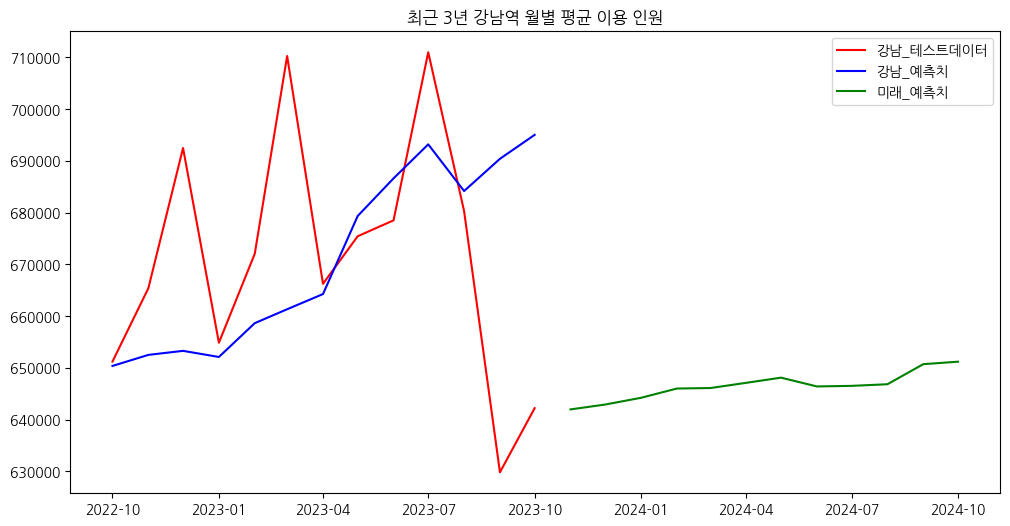

In [54]:
#미래_예측치
plt.figure(figsize=(12,6))
plt.title('최근 3년 강남역 월별 평균 이용 인원')
plt.plot(test['월평균승객'],color='red', label='강남_테스트데이터')
plt.plot(predictions_df['예측값'],color='blue', label='강남_예측치')
plt.plot(predictions_fcast['미래_예측값'],color='green', label='미래_예측치')
plt.legend()
plt.show()

---
### 홍대입구 예측모델

---

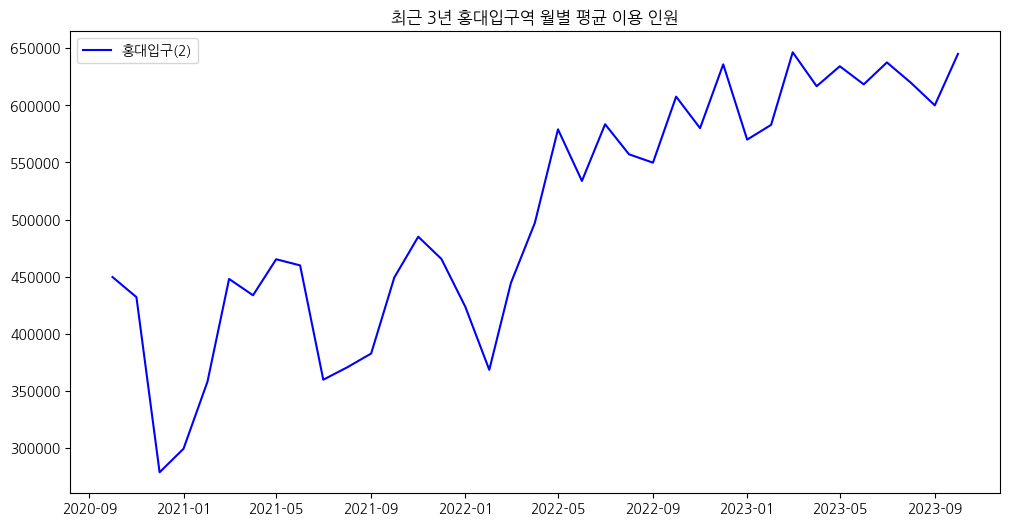

In [35]:
plt.figure(figsize=(12,6))
plt.title('최근 3년 홍대입구역 월별 평균 이용 인원')
plt.plot(metro_line2_top3['사용월'],metro_line2_top3['월평균승객'],color='blue', label='홍대입구(2)')
plt.legend()
plt.show()

In [36]:
metro_line2_top3_pred=pd.DataFrame()
metro_line2_top3_pred['사용월']=metro_line2_top3['사용월']
metro_line2_top3_pred['월평균승객']=metro_line2_top3['월평균승객']
metro_line2_top3_pred.set_index('사용월',inplace=True)
metro_line2_top3_pred

,월평균승객
사용월,
2023-10-01,644999.25
2023-09-01,599971.00
2023-08-01,619772.50
2023-07-01,637537.25
2023-06-01,618317.50
2023-05-01,634180.25
2023-04-01,616691.75
2023-03-01,646411.50
2023-02-01,582864.00


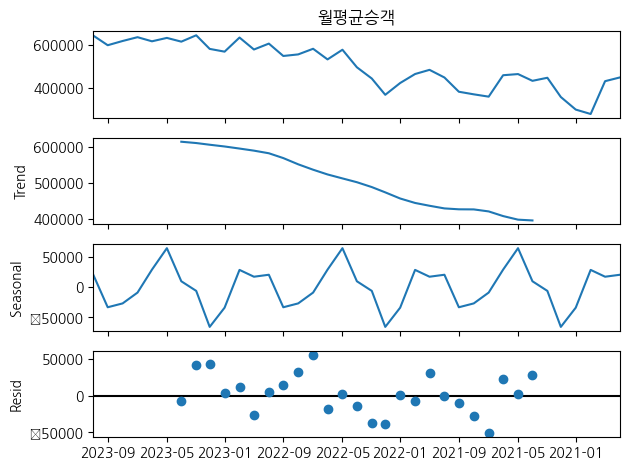

In [37]:
result = seasonal_decompose(metro_line2_top3_pred['월평균승객'], model='add')
result.plot();

In [38]:
auto_arima(metro_line2_top3_pred['월평균승객'],seasonal=True,m=12).summary()
#계절성주기를 12(1년 12개월) 입력하여 SARIMAX를 결정받는다.
#seasonal=True 는 계절성을 갖음을 나타냄
#SARIMAX(0,1,0)을 추천

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   37
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -442.314
Date:                Thu, 23 Nov 2023   AIC                            886.628
Time:                        00:55:32   BIC                            888.212
Sample:                             0   HQIC                           887.181
                                 - 37                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.675e+09   5.61e+08      4.773      0.000    1.58e+09    3.77e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 3.76
Prob(Q):                              0.72   Prob(JB):                         0.15
Heteroskedasticity (H):               3.05   Skew:                             0.71
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
train = metro_line2_top3_pred.iloc[len(metro_line2_top3_pred)-24:]       #3년전부터 1년전까지
test = metro_line2_top3_pred.iloc[:len(metro_line2_top3_pred)-24]      #1년전부터 올해

In [40]:
model = SARIMAX(train['월평균승객'],order=(1,1,0),seasonal_order=(1,0,0,12), trend='t')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              월평균승객   No. Observations:                   24
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -284.557
Date:                            Thu, 23 Nov 2023   AIC                            577.113
Time:                                    00:55:32   BIC                            581.655
Sample:                                         0   HQIC                           578.256
                                             - 24                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         63.6247    869.515      0.073      0.942   -1640.594    1767.843
ar.L1          0.0272      0.342      0.080      0.937      -0.642       0.697
ar.S.L12      -0.1026      0.322     -0.319      0.750      -0.733       0.528
sigma2      3.549e+09      0.000   7.63e+12      0.000    3.55e+09    3.55e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.82
Prob(Q):                              0.91   Prob(JB):                         0.24
Heteroskedasticity (H):               1.63   Skew:                             0.76
Prob(H) (two-sided):                  0.50   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.76e+28. Standard errors may be unstable.
"""

In [41]:
start=len(train)
end=len(train)+len(test)-1

predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')
#구하려는값이 차분되는 값인지 실제값인지를 결정하는 파라미터
predictions

24    458399.138215
25    461281.448397
26    464093.157870
27    455585.270691
28    456862.278334
29    461994.234431
30    462488.416616
31    473746.771419
32    481860.547802
33    486132.828822
34    472616.679023
35    473097.828817
36    474553.478711
Name: predicted_mean, dtype: float64

In [42]:
#인덱스 달아주기(예측값이 데이터 프레임이 아니기 때문에)
data=predictions
dates = ['2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
         '2023-02-01','2023-03-01','2023-04-01','2023-05-01',
         '2023-06-01','2023-07-01','2023-08-01','2023-09-01','2023-10-01']
predictions_df = pd.DataFrame(data.values, index=pd.to_datetime(dates))
predictions_df.reset_index(inplace=True)
predictions_df.rename(columns={'index':'사용월',0:'예측값'}, inplace=True)
predictions_df.set_index('사용월',inplace=True)
predictions_df

,예측값
사용월,
2022-10-01,458399.138215
2022-11-01,461281.448397
2022-12-01,464093.157870
2023-01-01,455585.270691
2023-02-01,456862.278334
2023-03-01,461994.234431
2023-04-01,462488.416616
2023-05-01,473746.771419
2023-06-01,481860.547802


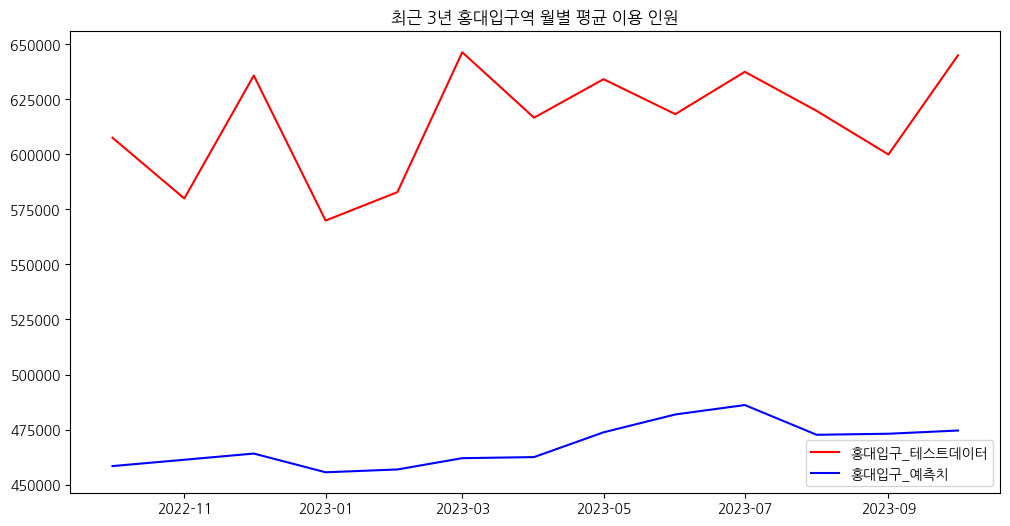

In [43]:
#예측치와 test 데이터 비교
plt.figure(figsize=(12,6))
plt.title('최근 3년 홍대입구역 월별 평균 이용 인원')
plt.plot(test['월평균승객'],color='red', label='홍대입구_테스트데이터')
plt.plot(predictions_df['예측값'],color='blue', label='홍대입구_예측치')
plt.legend()
plt.show()

In [44]:
#test 데이터 평균
test['월평균승객'].mean()

614932.0576923077

In [45]:
#평균 제곱근 오차
error = rmse(test['월평균승객'], predictions_df['예측값'])
print(f'평균 제곱근 오차: {error:11.10}')

평균 제곱근 오차:  150307.079


---
### 새로운 노선 그리기

---

1~9호선까지 승객 승하차 상위 3개역씩 뽑아서 지도에 표시

지하철 역의 좌표 csv
출처: https://developers.kakao.com/docs/latest/ko/local/dev-guide#address-coord

In [46]:
%pip install folium

In [130]:
#지하철 좌표 CSV 읽어오기
subway_location = pd.read_csv("C:/Users/82105/Desktop/2학년_2학기/오픈소스_개발_프로젝트/지하철_승하차_인원_분석/지하철 역 위치 좌표.csv")
subway_location.drop(columns={'주소'}, inplace=True)
subway_location.drop_duplicates(subset=['지하철역'], inplace=True)
subway_location.reset_index(drop=True)

#좌표없는 곳 (서울역) 서울역 좌표 추가해주기
seoul_station={'지하철역': ['서울역'],'x좌표': [37.554722],'y좌표':[126.970833]}
seoul_location=pd.DataFrame(seoul_station)
subway_location=pd.concat([subway_location,seoul_location], ignore_index=True)
subway_location


,지하철역,x좌표,y좌표
0,4.19민주묘지역,37.649457,127.013506
1,가능역,37.747906,127.044358
2,가락시장역,37.492915,127.118215
3,가산디지털단지역,37.482414,126.882240
4,가양역,37.561758,126.853997
...,...,...,...
521,회룡역,37.713908,127.046619
522,회현역,37.557688,126.976720
523,효창공원앞역,37.539622,126.960984
524,흑석역,37.508502,126.964009


In [150]:
top3_per_line

,평균 승차 인원 수_x,평균 하차 인원 수_x,평균 승하차 합계_x,평균 승차 인원 수_y,평균 하차 인원 수_y,평균 승하차 합계_y
지하철역,,,,,,
서울역,52562,50378,102940,52562,50378,102940
종각,38456,37283,75739,38456,37283,75739
종로3가,29201,26706,55907,29201,26706,55907
강남,89011,87066,176077,89011,87066,176077
잠실(송파구청),82314,81086,163400,82314,81086,163400
홍대입구,69352,73590,142942,69352,73590,142942
고속터미널,52902,51301,104203,52902,51301,104203
연신내,40971,38772,79743,40971,38772,79743
양재(서초구청),40053,43539,83592,40053,43539,83592


In [153]:
#최근 3년간 지하철 노선별 승하차인원이 제일 많은 역을 리스트로 추출
top3_per_line_list = top3_per_line.index.get_level_values('지하철역').tolist()
top3_per_line_list_mean = top3_per_line['평균 승하차 합계'].tolist()

#좌표 데이터셋의 지하철역 이름을 맞추기 위해 ()를 없애준다.
top3_per_line_list=[station.replace('잠실(송파구청)', '잠실') for station in top3_per_line_list]
top3_per_line_list=[station.replace('양재(서초구청)', '양재') for station in top3_per_line_list]
top3_per_line_list=[station.replace('수유(강북구청)', '수유') for station in top3_per_line_list]
top3_per_line_list=[station.replace('광화문(세종문화회관)', '광화문') for station in top3_per_line_list]


#좌표를 사용하기 위해 마지막에 '역' 붙여주기
for i in range(1,len(top3_per_line_list)):
    top3_per_line_list[i] += '역'

[102940,
 75739,
 55907,
 176077,
 163400,
 142942,
 104203,
 79743,
 83592,
 76658,
 76814,
 62651,
 67467,
 63055,
 61080,
 38918,
 39042,
 34042,
 90620,
 50708,
 48625,
 45024,
 39208,
 37344,
 68943,
 57921,
 56288]

In [154]:
#최근 3년간 지하철 노선별 승하차인원이 제일 많은 역의 좌표정보를 담은 데이터 프레임.
top3_per_line_location=pd.DataFrame()
top3_per_line_location['지하철역']=top3_per_line_list
top3_per_line_location = pd.merge(top3_per_line_location, subway_location, on='지하철역', how='left')
top3_per_line_location['평균 승하차 합계']=top3_per_line_list_mean
top3_per_line_location

,지하철역,x좌표,y좌표,평균 승하차 합계
0,서울역,37.554722,126.970833,102940
1,종각역,37.570233,126.981416,75739
2,종로3가역,37.570517,126.991117,55907
3,강남역,37.497057,127.028181,176077
4,잠실역,37.514063,127.102052,163400
5,홍대입구역,37.556890,126.923674,142942
6,고속터미널역,37.504850,127.004875,104203
7,연신내역,37.618933,126.920853,79743
8,양재역,37.484779,127.033384,83592
9,수유역,37.639822,127.027223,76658


In [156]:
import folium

# 서울의 중심에 위치하는 명동역의 위도와 경도를 중심으로 지도 출력합니다.
latitude = subway_location[subway_location['지하철역']=='명동역']['x좌표'] #위도설정
longitude = subway_location[subway_location['지하철역']=='명동역']['y좌표'] #경도설정
map_osm = folium.Map(location = [latitude, longitude], zoom_start = 12)

# 각 지하철 역의 위치 별로 마커를 지도에 추가
for i in top3_per_line_location.index:
    marker = folium.CircleMarker([top3_per_line_location['x좌표'][i],top3_per_line_location['y좌표'][i]],
                       radius = (top3_per_line_location['평균 승하차 합계'][i]+1)/15000, # 인원 수가 0일 때 계산오류 보정
                        popup = [top3_per_line_location['지하철역'][i],top3_per_line_location['평균 승하차 합계'][i]], 
                        color = 'blue', 
                        fill_color = 'blue')
    marker.add_to(map_osm)
map_osm